#### This notebook is made by Omar Ibrahim Sabek to discuss how Genetic Algorithm Works.

#### Our goal is to get the maximum point of a 3D function like Z = x * exp[-(x^2+y^2)] .

#### Let's graph the function and determine the minimum and maximum points over intervals [-2,2] for x and [-2,2] for y .

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x,y):
    return x*np.exp(-(x**2+y**2))

Text(0.5, 0.92, '$Z=X * exp[-(X^2+Y^2)]  $')

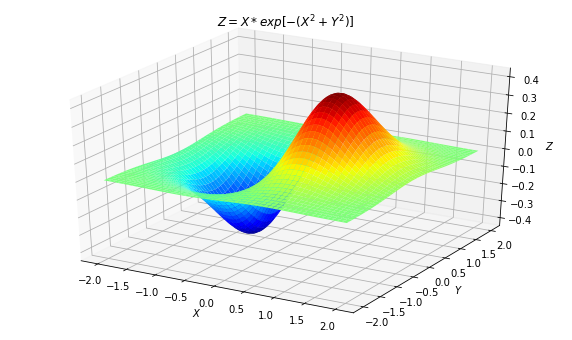

In [3]:
fig = plt.figure(figsize=[10,6])
ax = plt.axes(projection='3d')
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
ax.plot_surface(X, Y, Z,cmap="jet")
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax.set_title("$Z=X * exp[-(X^2+Y^2)]  $")

##### Now the maximum and minimum

In [4]:
f(0.7,0.5)

0.33397974086472404

In [5]:
mini=0
maxi=0
max_x=0;max_y=0;mini_x=0;mini_y=0
for i in x:
    for j in y:
        if f(i,j)<mini:
            mini_x=i;mini_y=j
            mini=f(i,j)
        elif f(i,j)>maxi:
            max_x=i;max_y=j
            maxi=f(i,j)
maxi=round(maxi,5)
mini=round(mini,5)
max_x=round(max_x,5)
max_y=round(max_y,5)
mini_x=round(mini_x,5)
mini_y=round(mini_y,5)
print("Minimum Z is {} at ({},{}) and Maximum Z is {} at ({},{})".format(mini,mini_x,mini_y,maxi,max_x,max_y))

Minimum Z is -0.42888 at (-0.70671,-0.002) and Maximum Z is 0.42888 at (0.70671,-0.002)


##### Minimum Z is -0.42888 at (-0.70671,-0.002) and Maximum Z is 0.42888 at (0.70671,-0.002)

#### Now, We'll Test how the genetic algorithm will reach the same solution or not.

### Genetic Algorithm (GA) is an evolutionary algorithm that mimics the inheritance process in genes .

#### GA works as follows :
* Initialize population (Chromosomes or Individuals)
* Rate the individuals of the population (Fitness Score or Reqiured Target)
* Choose individuals with best fitness score
* Make Crossover between best individuals while mutating them to mimic the natural inheritance process 
* Doing the same over and over on next generations

### Initializing Population

In [6]:
import random
def populate(size, x_boundaries, y_boundaries):
    population = []
    for i in range(size):
        individual = {
            "x": random.uniform(x_boundaries[0], x_boundaries[1]),
            "y": random.uniform(y_boundaries[0], y_boundaries[1])
                    }
        population.append(individual)
    return population

#### Let's See the first population

In [7]:
size=5
x_bound=(-2,2)
y_bound=(-2,2)
popu=populate(size,x_bound,y_bound)
popu

[{'x': 0.261427733267074, 'y': -0.28768438453115763},
 {'x': 1.277144670898131, 'y': 0.8235310911633422},
 {'x': 0.7253617061900077, 'y': 1.720794433110611},
 {'x': 1.858660853375345, 'y': -1.0883838496810037},
 {'x': 0.5857761190004793, 'y': 0.6815793106098593}]

#### Evaluate fitness values 

In [8]:
def target(individual):
    x = individual["x"]
    y = individual["y"]
    return x*np.exp(-(x**2+y**2))

In [9]:
[target(i) for i in popu]

[0.22476403664146305,
 0.12685949948191438,
 0.022184355865000102,
 0.017964758254130415,
 0.261191446217582]

#### These are the initial values of Z. The algorithm will try to maximize these values. To reach 0.428

#### Selecting parents to make crossover.

In [10]:
def sort_by_fitness(population):
    return sorted(population, key=target)

#### Let's see what individual the selection will choose 
#### Selecting by Tournament means selecting k number of chromosomes and choosing the chromosome with the highest score.

In [11]:
def choice_by_tournament(population,numb_of_choices):
    sP=[i for i in population if target(i) > 0]
    choiceS=random.sample(sP,k=numb_of_choices)
    choiceS=sort_by_fitness(choiceS)
    return choiceS[-1]

#### Testing the selection method:

In [12]:
first=choice_by_tournament(popu,int(size/3))
second=choice_by_tournament(popu,int(size/3))
print(first,target(first))
print(second,target(second))

{'x': 1.858660853375345, 'y': -1.0883838496810037} 0.017964758254130415
{'x': 0.7253617061900077, 'y': 1.720794433110611} 0.022184355865000102


#### Selection with tournament will work

#### Now the crossover between the best two parents (chromosomes) to get the new individual.

In [13]:
def crossover(individual_a, individual_b):
    xa = individual_a["x"]
    ya = individual_a["y"]

    xb = individual_b["x"]
    yb = individual_b["y"]

    return {"x": (xa + xb) / 2, "y": (ya + yb) / 2}


#### Mutating the new individual

In [14]:
def mutate(individual):
    next_x = individual["x"] + random.uniform(-0.5, 0.5)
    next_y = individual["y"] + random.uniform(-0.5, 0.5)

    return {"x": next_x, "y": next_y}

#### The last thing is to make the cycle of inheritance of the generations

In [15]:
def make_next_generation(previous_population):
    next_generation = []
    population_size = len(previous_population)
    for i in range(population_size):
        first=choice_by_tournament(previous_population,int(size/1.2))
        second=choice_by_tournament(previous_population,int(size/1.2))
        individual = crossover(first, second)
        individual = mutate(individual)
        next_generation.append(individual)

    return next_generation

#### Running the algorithm

In [16]:
generations = 100

population = populate(size=50, x_boundaries=(-2, 2), y_boundaries=(-2, 2))


for i in range(1,generations+1):
    population = make_next_generation(population)

best_individual = sort_by_fitness(population)[-1]

In [17]:
print("\nFinal Result")
print(best_individual, target(best_individual))


Final Result
{'x': 0.7329487191548694, 'y': -0.06719367963462498} 0.4263868034946681


#### The final result ( 0.422 ) is very close to the desired

Running the algorithm for 5 times we can see that final result will be very close to the desired.

In [18]:
for i in range(5):
    generations = 100

    population = populate(50,(-2, 2),(-2, 2))


    for i in range(1,generations+1):
        population = make_next_generation(population)

    best_individual = sort_by_fitness(population)[-1]
    print("\nFinal Result")
    print(best_individual,target(best_individual))


Final Result
{'x': 0.7037769222844715, 'y': -0.015665624974394388} 0.42876717931153324

Final Result
{'x': 0.7077981251403744, 'y': 0.02704679496207678} 0.42856790803784206

Final Result
{'x': 0.7176978038970846, 'y': 0.07425060736306864} 0.42642875365424554

Final Result
{'x': 0.7142301238719653, 'y': -0.10361363236928539} 0.4242592716522301

Final Result
{'x': 0.7422907314676889, 'y': -0.09031241689096678} 0.4243629593067845


#### Final Result
##### {'x': 0.7037769222844715, 'y': -0.015665624974394388} 0.42876717931153324